# THE FIRST MODEL
REALLY SUCKS BTW

In [7]:
import tensorflow as tf

In [8]:
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [ ]:
batch_size = 128
img_height = 150
img_width = 150

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',)

In [ ]:
data_dir = "Datasets"

train_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'training',
    shuffle=False,
)

val_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'validation',
    shuffle=False,
)

Found 956 images belonging to 10 classes.
Found 234 images belonging to 10 classes.


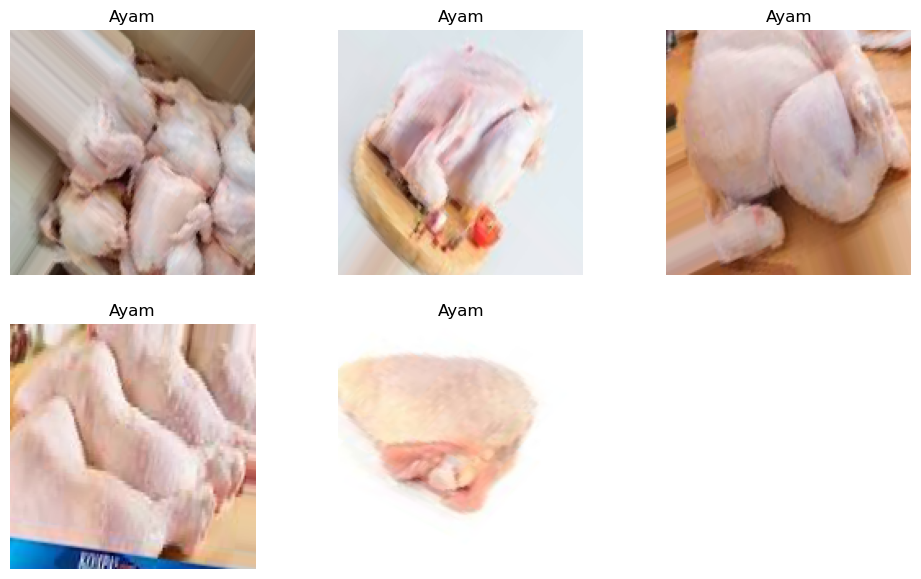

In [ ]:
import numpy as np
n = 5
plt.figure(figsize=(12, 7))
x,y = train_ds.next()
for i in range(0,n):
    image_x = x[i,:,:,:]
    ax = plt.subplot(2, 3, i + 1)
    label= list(train_ds.class_indices)[np.where(y[0]==1)[0][0]]
    plt.title(label)
    plt.imshow(image_x)
    plt.axis("off")

In [ ]:
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_2 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_3 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(
        train_ds,
        steps_per_epoch=956 // batch_size,
        epochs=50,
        validation_data=val_ds,
        validation_steps=234 // batch_size)

Epoch 1/50
7/7 [==============================] - 15s 2s/step - loss: 2.3783 - accuracy: 0.0785 - val_loss: 2.3219 - val_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 15s 2s/step - loss: 2.3170 - accuracy: 0.0531 - val_loss: 2.3117 - val_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 15s 2s/step - loss: 2.3110 - accuracy: 0.1147 - val_loss: 2.3114 - val_accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 17s 2s/step - loss: 2.3113 - accuracy: 0.1099 - val_loss: 2.3440 - val_accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 18s 3s/step - loss: 2.3867 - accuracy: 0.0495 - val_loss: 2.3074 - val_accuracy: 0.1094
Epoch 6/50
7/7 [==============================] - 16s 2s/step - loss: 2.3073 - accuracy: 0.1171 - val_loss: 2.3087 - val_accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 15s 2s/step - loss: 2.3043 - accuracy: 0.1365 - val_loss: 2.3101 - val_accuracy: 0.0000e+00
Epoch 8/50

KeyboardInterrupt: 

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# training_datagen = ImageDataGenerator(
#       rescale = 1./255,
# 	rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

# validation_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = training_datagen.flow(train_ds)
# test_generator = training_datagen.flow(test_ds)

# SECOND MODEL
PREDIKSINYA SALAH SEMUA

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',)

In [11]:
data_dir = "Datasets"

train_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'training',
    shuffle=False,
)

val_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'validation',
    shuffle=False,
)

Found 956 images belonging to 10 classes.
Found 234 images belonging to 10 classes.


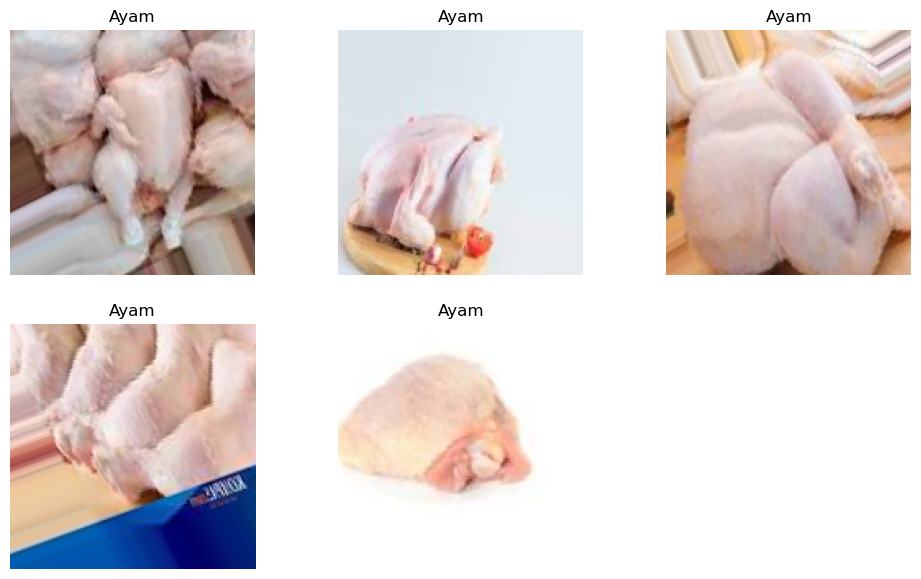

In [13]:
import numpy as np
import matplotlib.pyplot as plt
n = 5
plt.figure(figsize=(12, 7))
x,y = train_ds.next()
for i in range(0,n):
    image_x = x[i,:,:,:]
    ax = plt.subplot(2, 3, i + 1)
    label= list(train_ds.class_indices)[np.where(y[0]==1)[0][0]]
    plt.title(label)
    plt.imshow(image_x)
    plt.axis("off")

In [14]:
IMG_SHAPE = (150,150, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [15]:
base_model.trainable = False

In [16]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# prediction_layer = tf.keras.layers.Dense(10, activation="softmax")

In [17]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = "relu"),
  tf.keras.layers.Dense(256, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax")
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
validation_steps=20
initial_epochs = 100

history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/100
8/8 [==============================] - 48s 5s/step - loss: 2.6066 - accuracy: 0.0533 - val_loss: 2.3160 - val_accuracy: 0.1410
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 2.3883 - accuracy: 0.0994 - val_loss: 2.1934 - val_accuracy: 0.2051
Epoch 3/100
8/8 [==============================] - 18s 2s/step - loss: 2.2962 - accuracy: 0.1663 - val_loss: 2.1670 - val_accuracy: 0.2137
Epoch 4/100
8/8 [==============================] - 21s 2s/step - loss: 2.2174 - accuracy: 0.2061 - val_loss: 2.1197 - val_accuracy: 0.2436
Epoch 5/100
8/8 [==============================] - 18s 2s/step - loss: 2.1759 - accuracy: 0.2218 - val_loss: 2.0620 - val_accuracy: 0.3077
Epoch 6/100
8/8 [==============================] - 19s 2s/step - loss: 2.0782 - accuracy: 0.2782 - val_loss: 1.9749 - val_accuracy: 0.3205
Epoch 7/100
8/8 [==============================] - 20s 3s/step - loss: 2.0354 - accuracy: 0.3117 - val_loss: 1.9511 - val_accuracy: 0.3504
Epoch 8/100
8/8 [==========

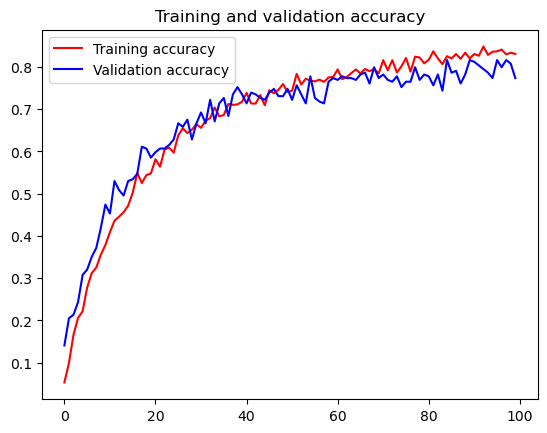

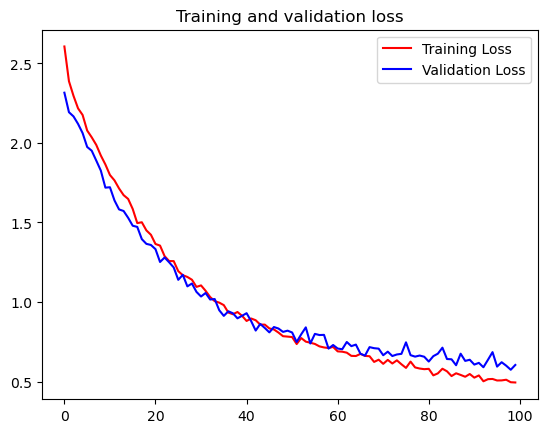

In [21]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
model.save("model/ModelV1")

INFO:tensorflow:Assets written to: model/ModelV1\assets


INFO:tensorflow:Assets written to: model/ModelV1\assets


In [25]:
#Save as TFLite

converter = tf.lite.TFLiteConverter.from_saved_model("model/ModelV1") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

## Predict

In [33]:
loaded_model = tf.keras.models.load_model('model/ModelV1/')

In [51]:
import os
class_names = os.listdir('Datasets')
class_names

['Ayam',
 'Bawang Merah',
 'Bawang Putih',
 'Ikan',
 'Kambing',
 'Sapi',
 'Tahu',
 'Telur',
 'Tempe',
 'Udang']

In [77]:
model.evaluate(train_ds)

8/8 [==============================] - 17s 2s/step - loss: 0.4522 - accuracy: 0.8577


[0.45218247175216675, 0.857740581035614]

In [79]:
# img_dir='Datasets/Ayam/'
# for i,img in enumerate(os.listdir(img_dir)):   
#     sunflower_path = img_dir + img

#     img = tf.keras.utils.load_img(
#         sunflower_path, target_size=(150, 150)
#     )
#     img_array = tf.keras.utils.img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0) # Create a batch

#     predictions = model.predict(img_array)
#     score = tf.nn.softmax(predictions[0])

#     print(
#         "This image most likely belongs to {} with a {:.2f} percent confidence."
#         .format(class_names[np.argmax(score)], 100 * np.max(score))
#     )

sunflower_path = 'Datasets/Ayam/httpsencryptedtbn0gstaticcomimagesqtbnANd9GcQ2DKlrGfcpw4DVp620JQye39Mjmkkjeyn6LmjqmLuJ2W0tAUhYGAoSp7YuLMws.jpg'

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 2s 2s/step
This image most likely belongs to Telur with a 14.25 percent confidence.


# THIRD MODEL
Nope, belum ada yang bener

## Training as A Binary Model

Failed as F***

In [211]:
import tensorflow as tf

In [223]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # validation_split=0.1,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='wrap')

In [224]:
data_dir = "SampleDatasets"

train_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='binary',
  	batch_size=32,
    subset = 'training'
)

Found 222 images belonging to 2 classes.


In [225]:
# val_ds = datagen.flow_from_directory(
# 	data_dir,
# 	target_size=(150,150),
# 	class_mode='binary',
#   	batch_size=128,
#     subset = 'validation'
# )

In [241]:
from PIL import Image
def plot_images(folder):
    subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
    _, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    for i, subfolder in enumerate(subfolders):
        filenames = os.listdir(subfolder)
        image_path = os.path.join(subfolder, filenames[4])
        image = Image.open(image_path)
        image = image.resize((150,150))
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(os.path.basename(subfolder))
        ax.axis("off")

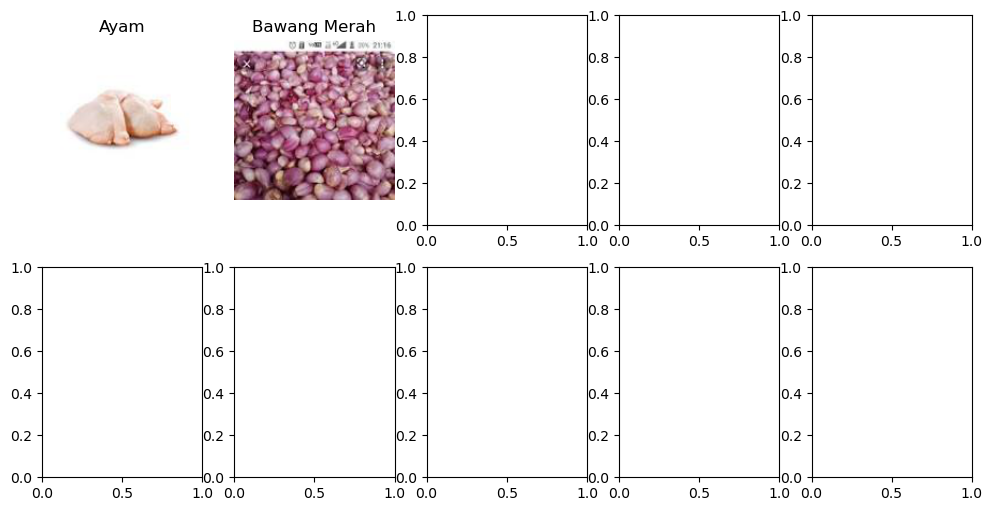

In [242]:
plot_images(data_dir)

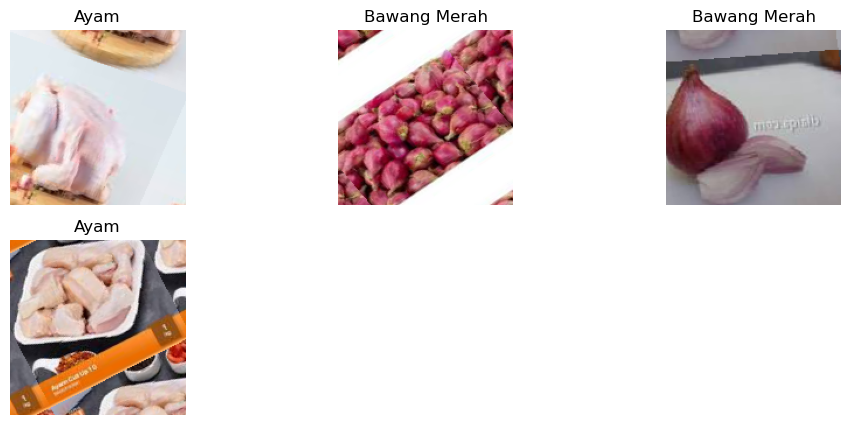

In [226]:
import numpy as np
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(12, 5))

for i in range(0,n):
    x,y = train_ds.next()
    image_x = x[0,:,:,:]
    ax = plt.subplot(2, 3, i + 1)
    label = y[0]
    # label= np.where(y==1)[0]
    label= list(train_ds.class_indices)[int(y[0])]
    plt.title(label)
    plt.imshow(image_x)
    plt.axis("off")

In [227]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150,150,3),
                                               include_top=False,
                                               weights='imagenet',
                                               classifier_activation="relu")

base_model.trainable = False

# model3 = tf.keras.Sequential([
#     # Note the input shape is the desired size of the image 300x300 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model3 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# base_learning_rate = 0.0001
model3.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model3.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_59 (Conv2D)          (None, 3, 3, 16)          184336    
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 16)                0         
                                                                 
 dense_76 (Dense)            (None, 512)               8704      
                                                                 
 dense_77 (Dense)            (None, 1)               

In [228]:
validation_steps=2
initial_epochs = 5


history3 = model3.fit(train_ds,
                    epochs=initial_epochs,
                    # validation_data=val_ds
                    )

Epoch 1/5
7/7 [==============================] - 6s 418ms/step - loss: 0.5080 - accuracy: 0.7613
Epoch 2/5
7/7 [==============================] - 3s 464ms/step - loss: 0.2898 - accuracy: 0.8784
Epoch 3/5
7/7 [==============================] - 4s 476ms/step - loss: 0.1304 - accuracy: 0.9640
Epoch 4/5
7/7 [==============================] - 4s 495ms/step - loss: 0.1646 - accuracy: 0.9414
Epoch 5/5
7/7 [==============================] - 3s 469ms/step - loss: 0.1352 - accuracy: 0.9459


In [229]:
# sunflower_path = 'SampleDatasets/test2.jpg'

# img = tf.keras.utils.load_img(
#     sunflower_path, target_size=(150, 150)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model3.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

In [230]:
img_dir='Datasets/Bawang Merah/'
for i,img in enumerate(os.listdir(img_dir)):   
    sunflower_path = img_dir + img

    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(150, 150)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

1/1 [==============================] - 0s 39ms/step
This image most likely belongs to Ayam with a 100.00 percent confidence.
1/1 [==============================] - 0s 41ms/step
This image most likely belongs to Ayam with a 100.00 percent confidence.
1/1 [==============================] - 0s 36ms/step
This image most likely belongs to Ayam with a 100.00 percent confidence.
1/1 [==============================] - 0s 35ms/step
This image most likely belongs to Ayam with a 100.00 percent confidence.
1/1 [==============================] - 0s 37ms/step
This image most likely belongs to Ayam with a 100.00 percent confidence.
1/1 [==============================] - 0s 35ms/step
This image most likely belongs to Ayam with a 100.00 percent confidence.
1/1 [==============================] - 0s 40ms/step
This image most likely belongs to Ayam with a 100.00 percent confidence.
1/1 [==============================] - 0s 33ms/step
This image most likely belongs to Ayam with a 100.00 percent confidence.


## Another Training Session
Kenapa semua bawang merah njirrr

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from tensorflow.keras.models import load_model

In [3]:
train_datagen = ImageDataGenerator(
        validation_split=0.1,
        rescale=1./255,
        rotation_range=50,
        shear_range=0.3,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.25,
)
valid_datagen = ImageDataGenerator(
        validation_split=0.1,
        rescale=1./255
)

In [4]:
batch_size = 128
train_gen = train_datagen.flow_from_directory(
    "SampleDatasets",
    batch_size=batch_size,
    target_size=(224, 224),
    shuffle=True,
    subset='training'
)

val_gen = valid_datagen.flow_from_directory(
    "SampleDatasets",
    batch_size=batch_size,
    target_size=(224, 224),
    shuffle=False,
    subset='validation'
)


Found 289 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [5]:
def visualize_images(images,labels):
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(train_gen.class_indices.keys())
    img_no = 0
    for i in range(3):
        for j in range(3):
            img = images[img_no]
            lbl = np.argmax(labels[img_no])

            ax[i,j].imshow(img)
            ax[i,j].set_title(classes[lbl])
            ax[i,j].set_axis_off()
            img_no+=1

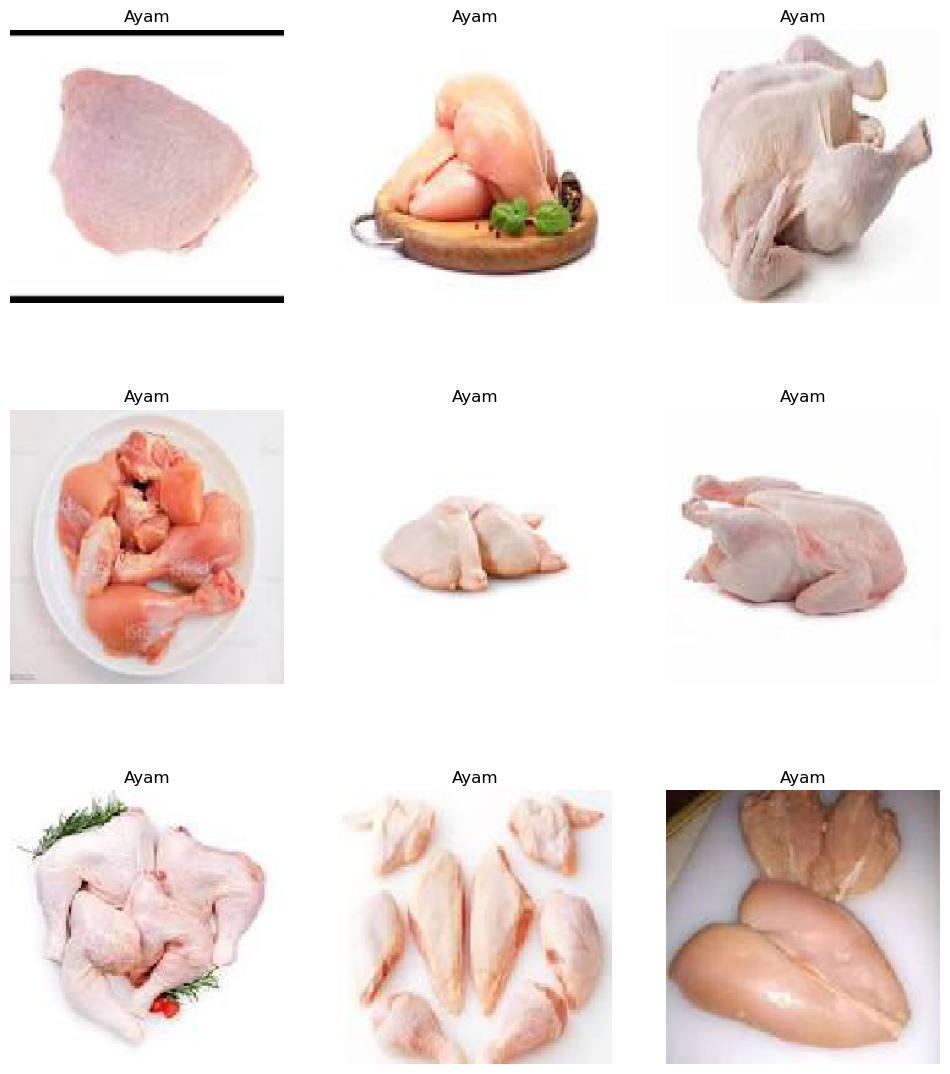

In [31]:
images, labels = next(val_gen)
visualize_images(images,labels)

In [7]:
base = MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
base.trainable = True
model = Sequential()
model.add(base)
# model.add(Flatten())
model.add(GlobalAveragePooling2D())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
# opt = SGD(lr=0.001, momentum=0.9)
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

In [8]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 1,verbose = 1)
early_stop = EarlyStopping(monitor = 'val_accuracy',patience = 5,verbose = 1,restore_best_weights = True)

In [30]:
history = model.fit(train_gen, 
                    epochs=20,
                    validation_data = val_gen,
                    # callbacks=[early_stop, reduce_lr]
                    )

Epoch 1/20
3/3 [==============================] - 33s 14s/step - loss: 0.2884 - accuracy: 0.8824 - val_loss: 0.4752 - val_accuracy: 0.7333
Epoch 2/20
3/3 [==============================] - 33s 14s/step - loss: 0.2213 - accuracy: 0.9308 - val_loss: 0.4712 - val_accuracy: 0.7333
Epoch 3/20
3/3 [==============================] - 33s 9s/step - loss: 0.2816 - accuracy: 0.9100 - val_loss: 0.4672 - val_accuracy: 0.7333
Epoch 4/20
3/3 [==============================] - 33s 9s/step - loss: 0.2681 - accuracy: 0.9170 - val_loss: 0.4633 - val_accuracy: 0.7333
Epoch 5/20
3/3 [==============================] - 33s 15s/step - loss: 0.2657 - accuracy: 0.9135 - val_loss: 0.4598 - val_accuracy: 0.7333
Epoch 6/20
3/3 [==============================] - 38s 10s/step - loss: 0.2739 - accuracy: 0.9066 - val_loss: 0.4563 - val_accuracy: 0.7333
Epoch 7/20
3/3 [==============================] - 34s 9s/step - loss: 0.2376 - accuracy: 0.9308 - val_loss: 0.4524 - val_accuracy: 0.7333
Epoch 8/20
3/3 [==============

In [38]:
import os
classes = list(train_gen.class_indices.keys())
classes

['Ayam', 'Bawang Merah', 'Sapi']

In [40]:
import tensorflow as tf

img_dir = "Datasets/Sapi/"
for i,img in enumerate(os.listdir(img_dir)):   
    sunflower_path = img_dir + img
    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(224,224)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(classes[np.argmax(score)], 100 * np.max(score))
    )

1/1 [==============================] - 0s 60ms/step
This image most likely belongs to Bawang Merah with a 56.51 percent confidence.
1/1 [==============================] - 0s 65ms/step
This image most likely belongs to Bawang Merah with a 56.95 percent confidence.
1/1 [==============================] - 0s 61ms/step
This image most likely belongs to Bawang Merah with a 56.45 percent confidence.
1/1 [==============================] - 0s 72ms/step
This image most likely belongs to Bawang Merah with a 55.13 percent confidence.
1/1 [==============================] - 0s 74ms/step
This image most likely belongs to Bawang Merah with a 55.46 percent confidence.
1/1 [==============================] - 0s 70ms/step
This image most likely belongs to Bawang Merah with a 55.54 percent confidence.
1/1 [==============================] - 0s 67ms/step
This image most likely belongs to Bawang Merah with a 56.48 percent confidence.
1/1 [==============================] - 0s 67ms/step
This image most likely b

In [27]:
sunflower_path = 'Test.jpeg'

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 42ms/step
This image most likely belongs to Bawang Merah with a 57.51 percent confidence.
